<a href="https://colab.research.google.com/github/DanAlin19/AAD/blob/main/AAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [48]:
!mkdir -p ~/.kaggle
!cp '/content/drive/My Drive/kaggle/kaggle.json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [49]:
!pip install pycountry

In [50]:
import kaggle

kaggle.api.dataset_download_files('atharvasoundankar/global-music-streaming-trends-and-listener-insights', path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/global-music-streaming-trends-and-listener-insights


In [51]:
import pandas as pd
df = pd.read_csv('./data/Global_Music_Streaming_Listener_Preferences.csv', sep=',')
df.head()

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55,Australia,YouTube,Reggae,348,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13,Germany,Amazon Music,Reggae,30,328,Adele,Free,Night,30.68,43.41


Detalii despre valorile din coloane

In [52]:
df.describe()

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,36.664000,309.237200,253.51720,50.296464,42.391060
std,13.763844,172.029822,146.36928,23.171936,21.444121
min,13.000000,10.000000,1.00000,10.020000,5.000000
25%,25.000000,161.000000,126.00000,30.147500,24.195000
50%,37.000000,316.000000,254.00000,50.420000,41.960000
75%,49.000000,457.250000,382.00000,70.337500,60.740000
max,60.000000,600.000000,500.00000,89.990000,79.990000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

Verificare valori nule

In [54]:
df.isnull().sum()

,0
User_ID,0
Age,0
Country,0
Streaming Platform,0
Top Genre,0
Minutes Streamed Per Day,0
Number of Songs Liked,0
Most Played Artist,0
Subscription Type,0
Listening Time (Morning/Afternoon/Night),0


Verificare valori duplicate

In [55]:
df.duplicated().sum()

np.int64(0)

Verificari inconsistente de format sau scriere

In [56]:
df['Listening Time (Morning/Afternoon/Night)'].unique()

array(['Afternoon', 'Night', 'Morning'], dtype=object)

In [57]:
df['Streaming Platform'].unique()

array(['Tidal', 'Deezer', 'YouTube', 'Amazon Music', 'Spotify',
       'Apple Music'], dtype=object)

In [58]:
df['Top Genre'].unique()

array(['Reggae', 'Country', 'Pop', 'EDM', 'Classical', 'Metal', 'Rock',
       'Hip-Hop', 'R&B', 'Jazz'], dtype=object)

In [59]:
df['Country'].unique()

array(['Japan', 'Germany', 'Australia', 'South Korea', 'UK', 'Brazil',
       'Canada', 'India', 'USA', 'France'], dtype=object)

In [60]:
df['Country'].unique()

array(['Japan', 'Germany', 'Australia', 'South Korea', 'UK', 'Brazil',
       'Canada', 'India', 'USA', 'France'], dtype=object)

In [61]:
df['Most Played Artist'].unique()

array(['Adele', 'Ed Sheeran', 'Post Malone', 'Dua Lipa', 'The Weeknd',
       'Billie Eilish', 'BTS', 'Taylor Swift', 'Drake', 'Bad Bunny'],
      dtype=object)

In [62]:
df['Subscription Type'].unique()

array(['Free', 'Premium'], dtype=object)

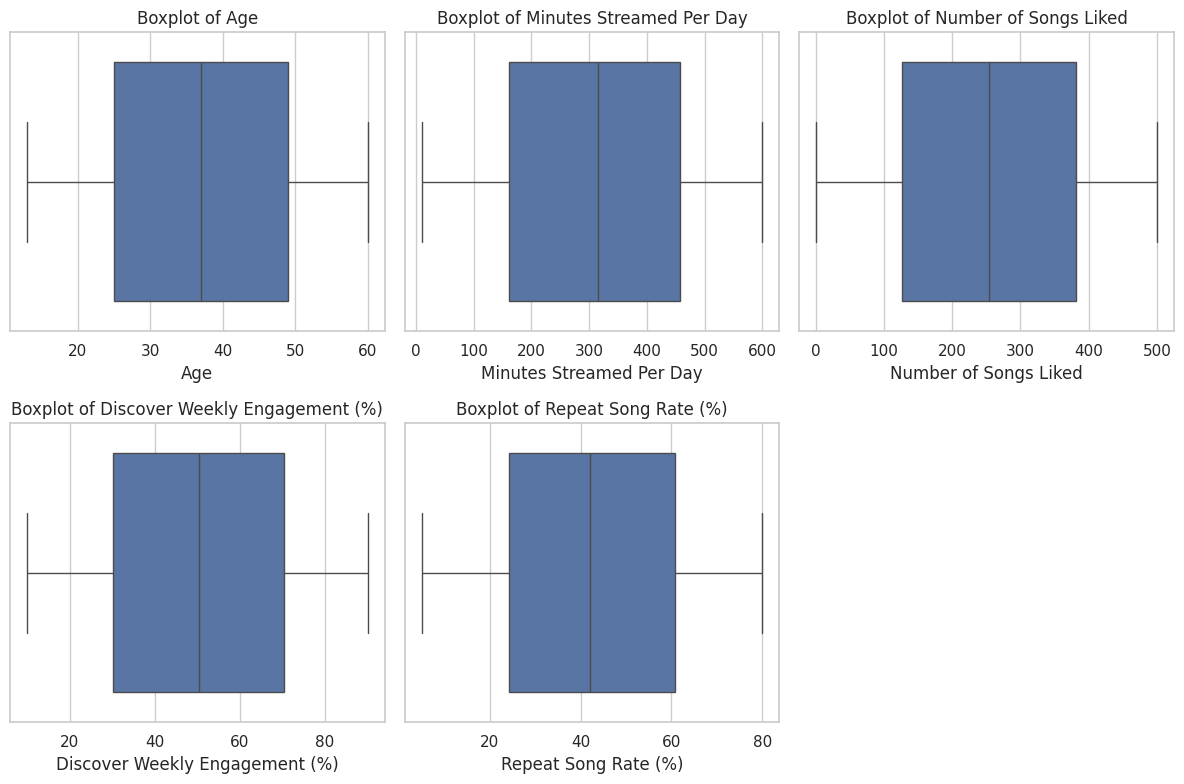

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Age', 'Minutes Streamed Per Day', 'Number of Songs Liked', 'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Analiza cantitativa cu vizualizari


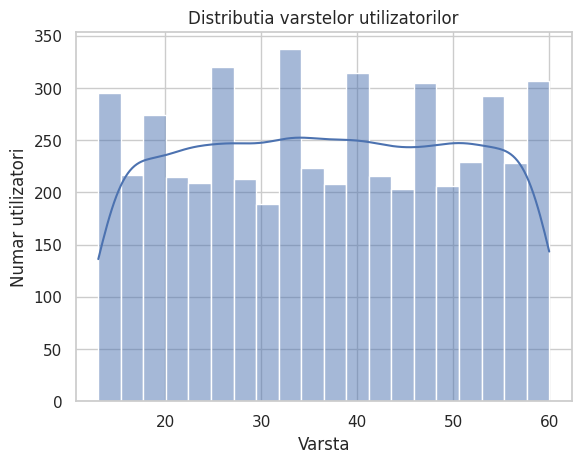

In [64]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distributia varstelor utilizatorilor")
plt.xlabel("Varsta")
plt.ylabel("Numar utilizatori")
plt.show()

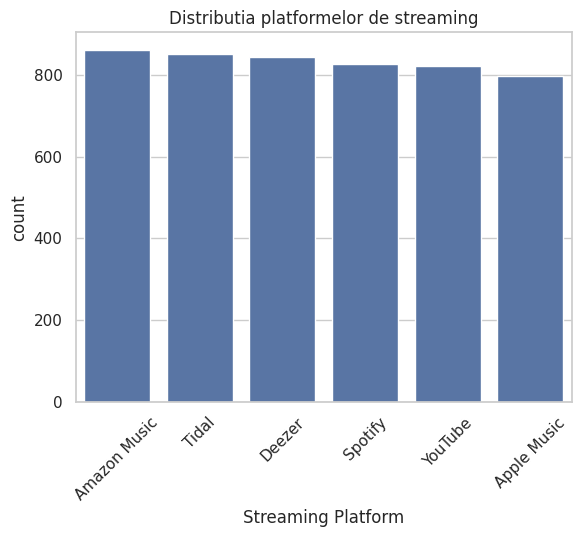

In [65]:
sns.countplot(x='Streaming Platform', data=df, order=df['Streaming Platform'].value_counts().index)
plt.title("Distributia platformelor de streaming")
plt.xticks(rotation=45)
plt.show()

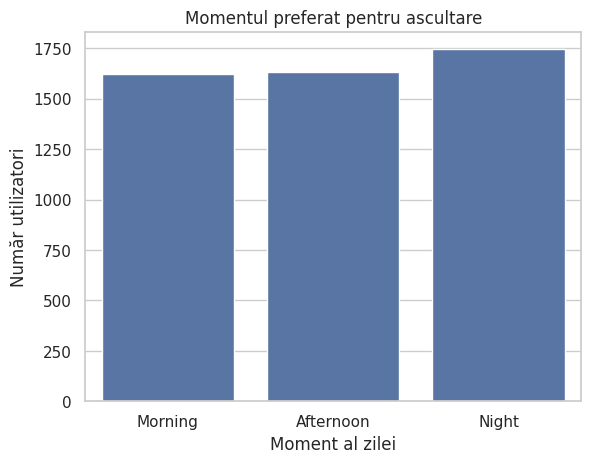

In [66]:
sns.countplot(x='Listening Time (Morning/Afternoon/Night)', data=df, order=['Morning', 'Afternoon', 'Night'])
plt.title("Momentul preferat pentru ascultare")
plt.xlabel("Moment al zilei")
plt.ylabel("Număr utilizatori")
plt.show()


<ipython-input-67-1d3fbcbbf46f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




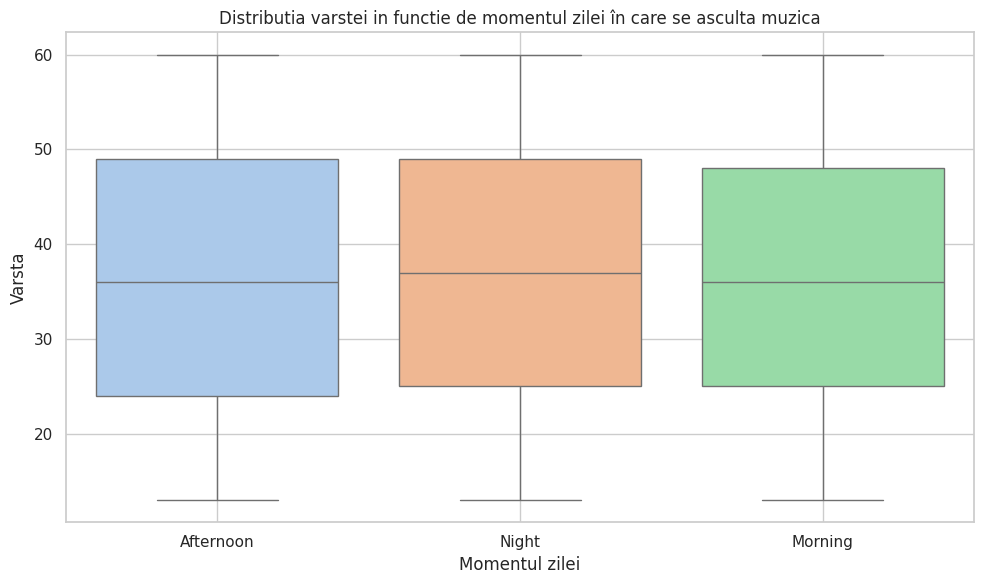

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Listening Time (Morning/Afternoon/Night)', y='Age', data=df, palette='pastel')

plt.title('Distributia varstei in functie de momentul zilei în care se asculta muzica')
plt.xlabel('Momentul zilei')
plt.ylabel('Varsta')
plt.grid(True)
plt.tight_layout()
plt.show()

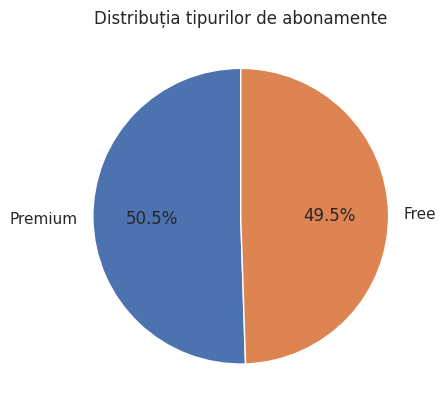

In [68]:
df['Subscription Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribuția tipurilor de abonamente")
plt.ylabel("")
plt.show()


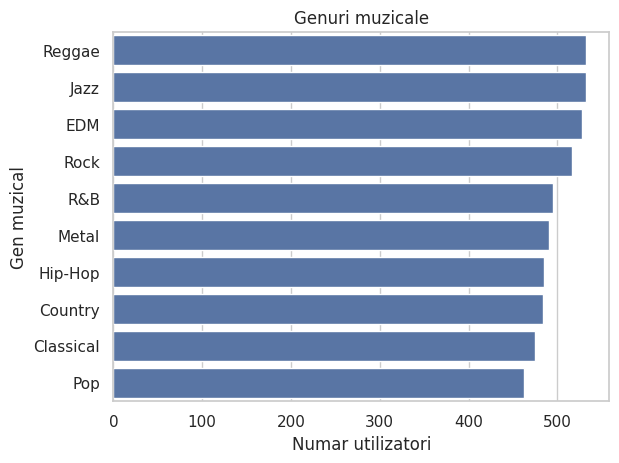

In [69]:
top_genres = df['Top Genre'].value_counts()
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Genuri muzicale")
plt.xlabel("Numar utilizatori")
plt.ylabel("Gen muzical")
plt.show()


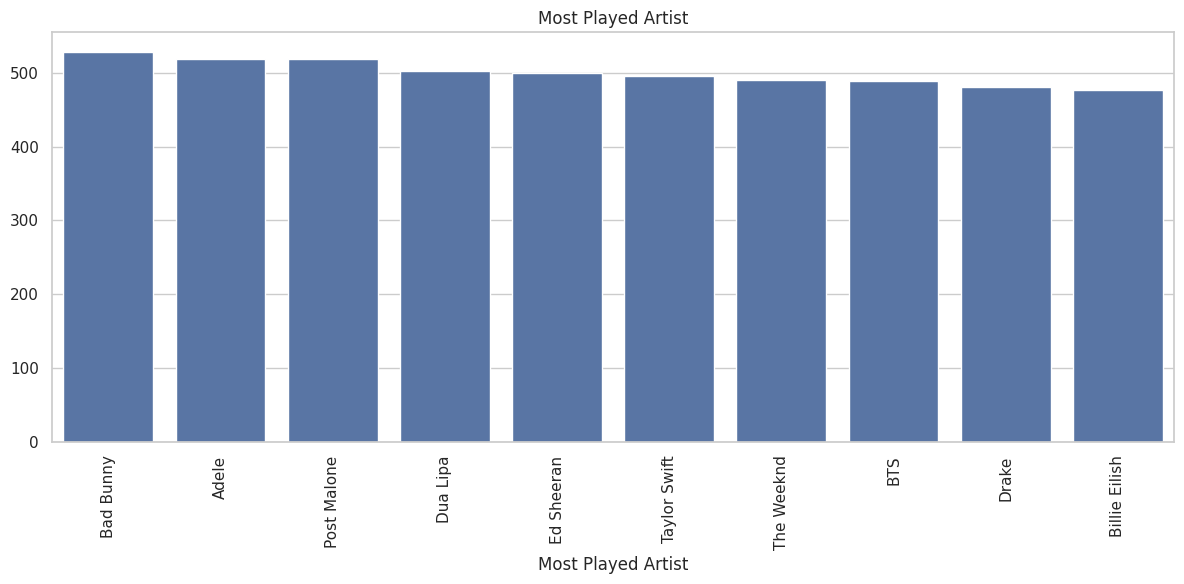

In [70]:
most_played_artist_counts = df['Most Played Artist'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=most_played_artist_counts.index, y=most_played_artist_counts.values)
plt.title('Most Played Artist')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

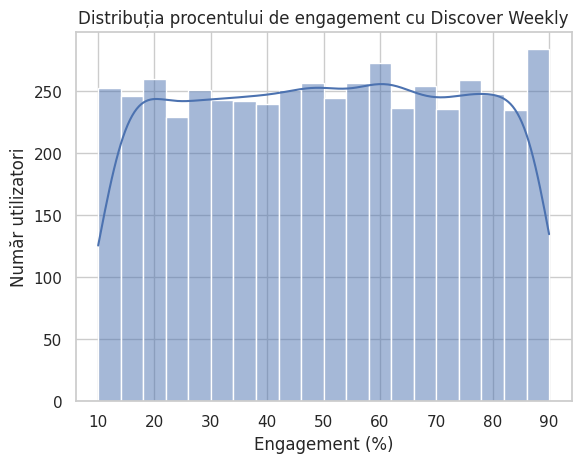

In [71]:
sns.histplot(df['Discover Weekly Engagement (%)'], bins=20, kde=True)
plt.title("Distribuția procentului de engagement cu Discover Weekly")
plt.xlabel("Engagement (%)")
plt.ylabel("Număr utilizatori")
plt.show()


Corelari

Corelari valori numerice

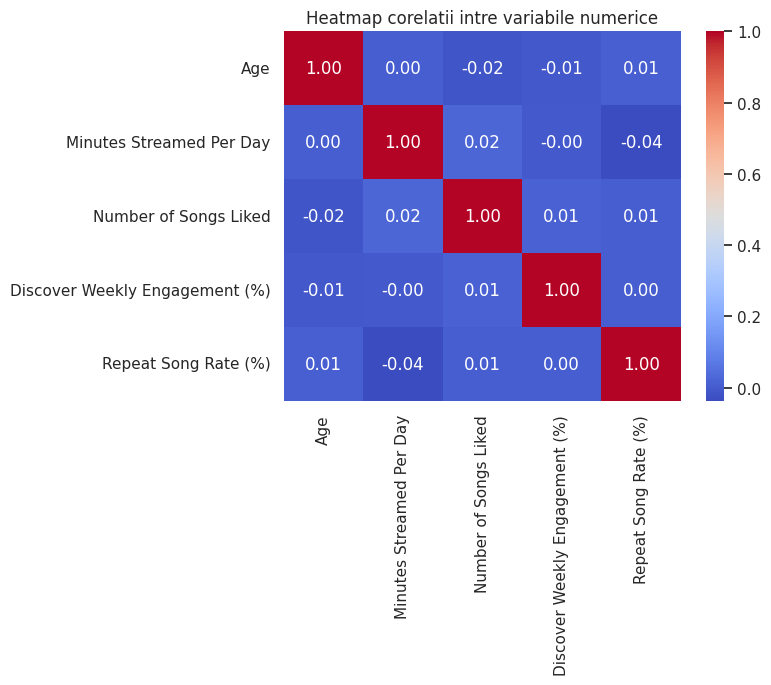

In [72]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap corelatii intre variabile numerice")
plt.show()

Corelari varsta si minute ascultate pe zi (vrem sa vedem daca varsta influenteaza cat de mult timp petrec persoanele ascultand muzica)

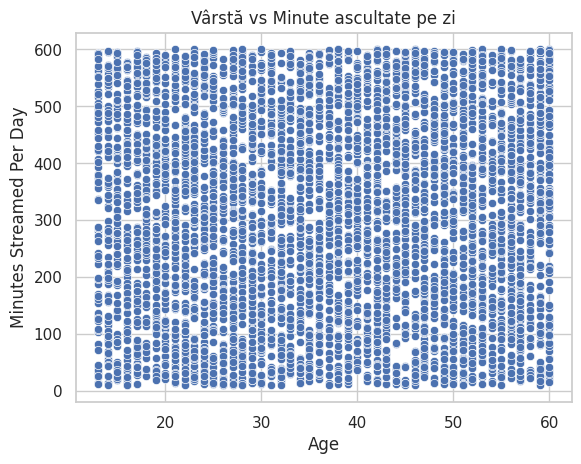

,Age,Minutes Streamed Per Day
Age,1.000000,0.004166
Minutes Streamed Per Day,0.004166,1.000000


In [73]:
sns.scatterplot(x='Age', y='Minutes Streamed Per Day', data=df)
plt.title("Vârstă vs Minute ascultate pe zi")
plt.show()

df[['Age', 'Minutes Streamed Per Day']].corr()


Corelari intre numar melodii apreciate si timp de ascultare zilnic (vrem sa vedem daca cei care petrec mai mult timp ascultand muzica dau like la mai multe piese)

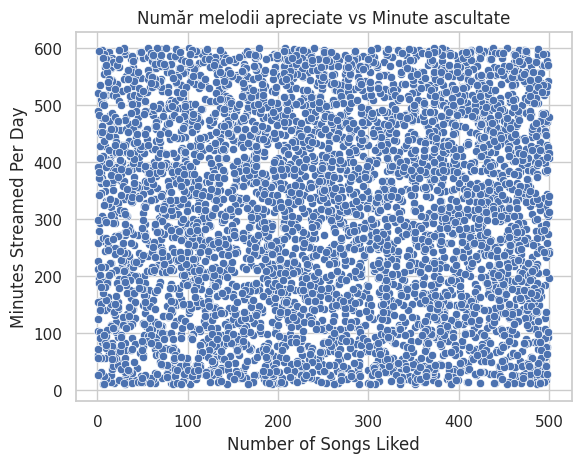

,Number of Songs Liked,Minutes Streamed Per Day
Number of Songs Liked,1.000000,0.023487
Minutes Streamed Per Day,0.023487,1.000000


In [74]:
sns.scatterplot(x='Number of Songs Liked', y='Minutes Streamed Per Day', data=df)
plt.title("Număr melodii apreciate vs Minute ascultate")
plt.show()

df[['Number of Songs Liked', 'Minutes Streamed Per Day']].corr()


Corelari intre rata de descoperire a pieselor noi saptamanala si rata de repetare a pieselor (vrem sa vedem daca cei care descopera muzica noua, nu repeta aceleasi piese)

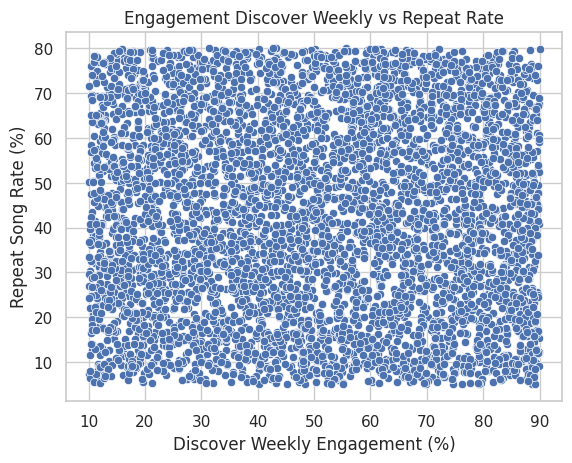

,Discover Weekly Engagement (%),Repeat Song Rate (%)
Discover Weekly Engagement (%),1.000000,0.004186
Repeat Song Rate (%),0.004186,1.000000


In [75]:
sns.scatterplot(x='Discover Weekly Engagement (%)', y='Repeat Song Rate (%)', data=df)
plt.title("Engagement Discover Weekly vs Repeat Rate")
plt.show()

df[['Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']].corr()


Corelari intre tipul de subscriptie si minutele de ascultare zilnice (vrem sa vedem daca tipul de subscriptie influenteaza timpul de ascultare)

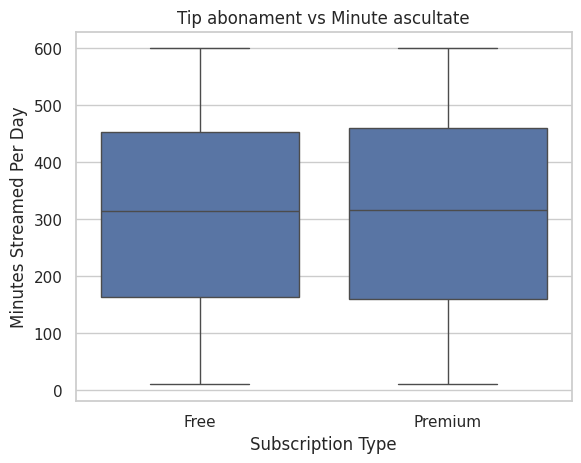

In [76]:
df.groupby('Subscription Type')['Minutes Streamed Per Day'].mean()
sns.boxplot(x='Subscription Type', y='Minutes Streamed Per Day', data=df)
plt.title("Tip abonament vs Minute ascultate")
plt.show()

In [77]:
# Împărțirea dataset-ului pe intervale de vârstă
df_13_24 = df[(df['Age'] >= 13) & (df['Age'] <= 24)]
df_25_39 = df[(df['Age'] >= 25) & (df['Age'] <= 39)]
df_40_60 = df[(df['Age'] >= 40) & (df['Age'] <= 60)]

In [78]:
df_13_24.describe()

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000
mean,18.550413,311.215702,262.401653,49.900727,41.570364
std,3.457819,173.754170,147.190347,23.092128,21.414219
min,13.000000,10.000000,1.000000,10.040000,5.110000
25%,16.000000,157.250000,130.250000,29.100000,23.845000
50%,19.000000,314.000000,265.500000,50.665000,40.825000
75%,22.000000,458.750000,395.000000,69.345000,60.105000
max,24.000000,600.000000,500.000000,89.990000,79.990000


In [79]:
df_25_39.describe()

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000
mean,32.021999,304.580138,251.399749,50.754965,43.043947
std,4.308557,169.845375,145.094924,23.393737,21.446824
min,25.000000,10.000000,1.000000,10.020000,5.030000
25%,28.000000,156.000000,127.000000,30.400000,24.855000
50%,32.000000,312.000000,249.000000,51.360000,43.500000
75%,36.000000,450.500000,380.000000,70.805000,61.445000
max,39.000000,600.000000,499.000000,89.970000,79.960000


In [80]:
df_40_60.describe()

,Age,Minutes Streamed Per Day,Number of Songs Liked,Discover Weekly Engagement (%),Repeat Song Rate (%)
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,49.989541,311.517963,250.160528,50.182487,42.370277
std,6.081519,172.656869,146.702410,23.059387,21.452507
min,40.000000,10.000000,1.000000,10.140000,5.000000
25%,45.000000,166.000000,122.500000,30.860000,23.765000
50%,50.000000,318.000000,248.000000,49.580000,41.830000
75%,55.000000,460.000000,377.000000,70.770000,60.555000
max,60.000000,600.000000,500.000000,89.930000,79.980000


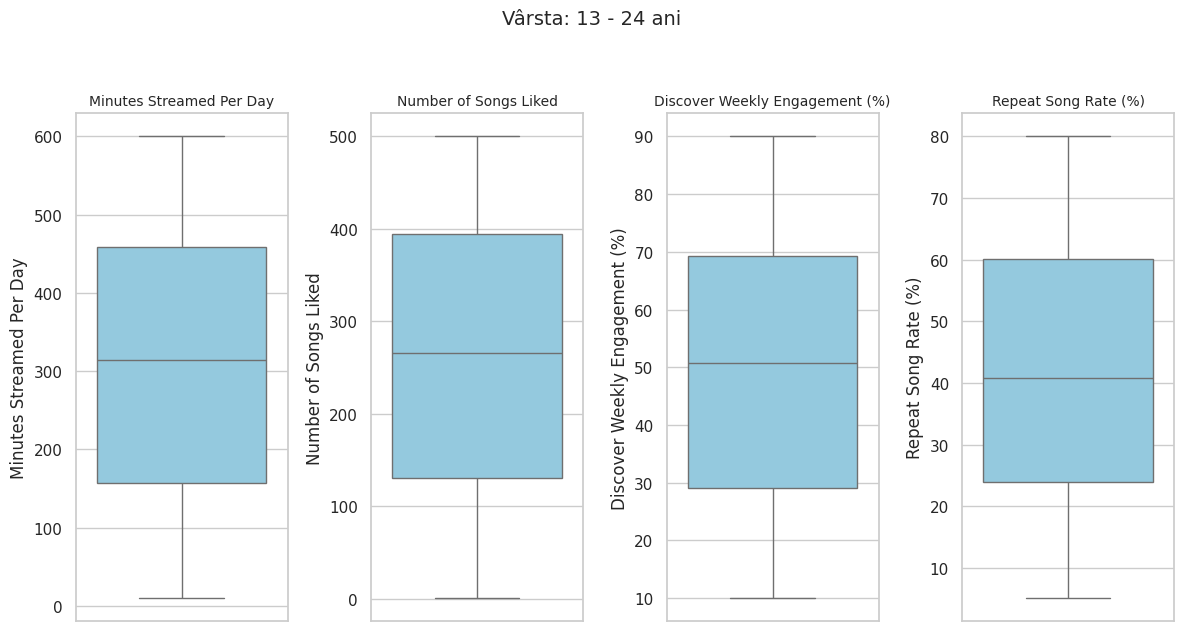

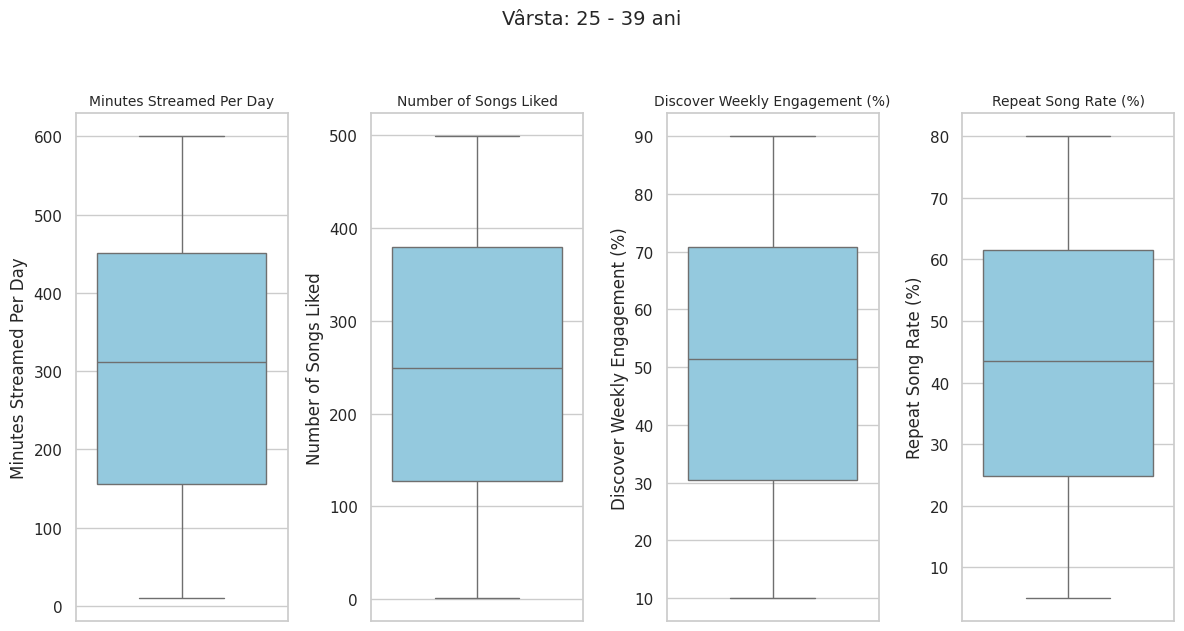

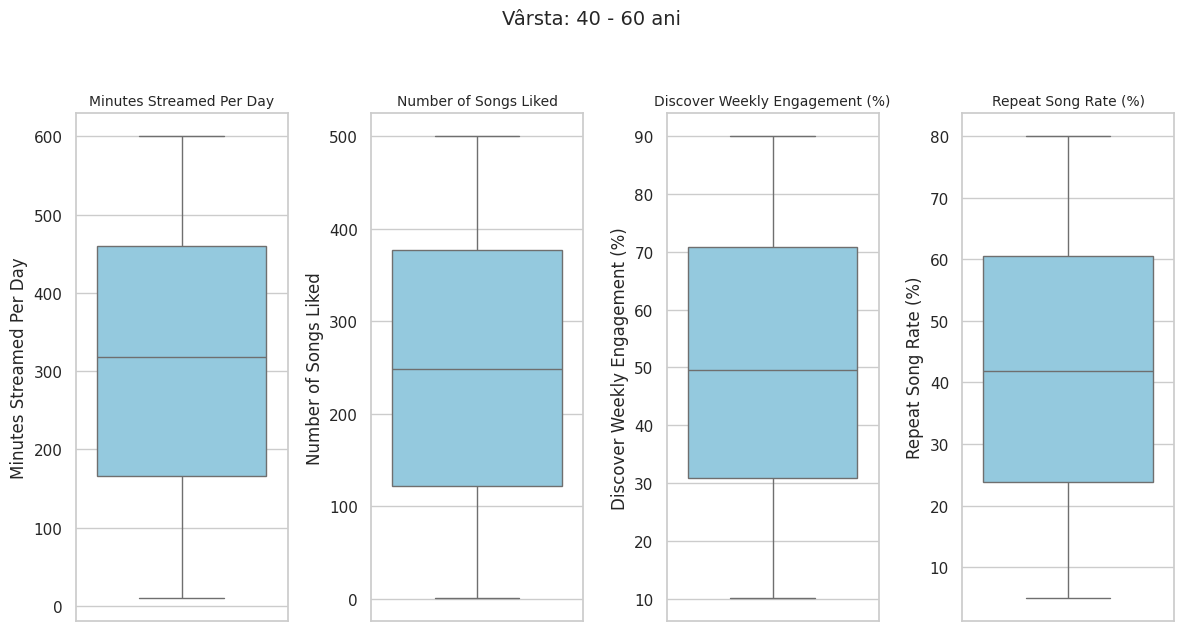

In [81]:
# Funcție pentru a crea boxplot-urile
def plot_boxplots(data, age_range_title):
    plt.figure(figsize=(12, 6))
    features = ['Minutes Streamed Per Day', 'Number of Songs Liked',
                'Discover Weekly Engagement (%)', 'Repeat Song Rate (%)']

    for i, feature in enumerate(features, 1):
        plt.subplot(1, 4, i)
        sns.boxplot(y=data[feature], color='skyblue')
        plt.title(feature, fontsize=10)
        plt.xlabel('')  # scoate labelul de pe axa x
        plt.tight_layout()

    plt.suptitle(f'{age_range_title}', fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()

# Apeluri pentru fiecare subset
plot_boxplots(df_13_24, 'Vârsta: 13 - 24 ani')
plot_boxplots(df_25_39, 'Vârsta: 25 - 39 ani')
plot_boxplots(df_40_60, 'Vârsta: 40 - 60 ani')

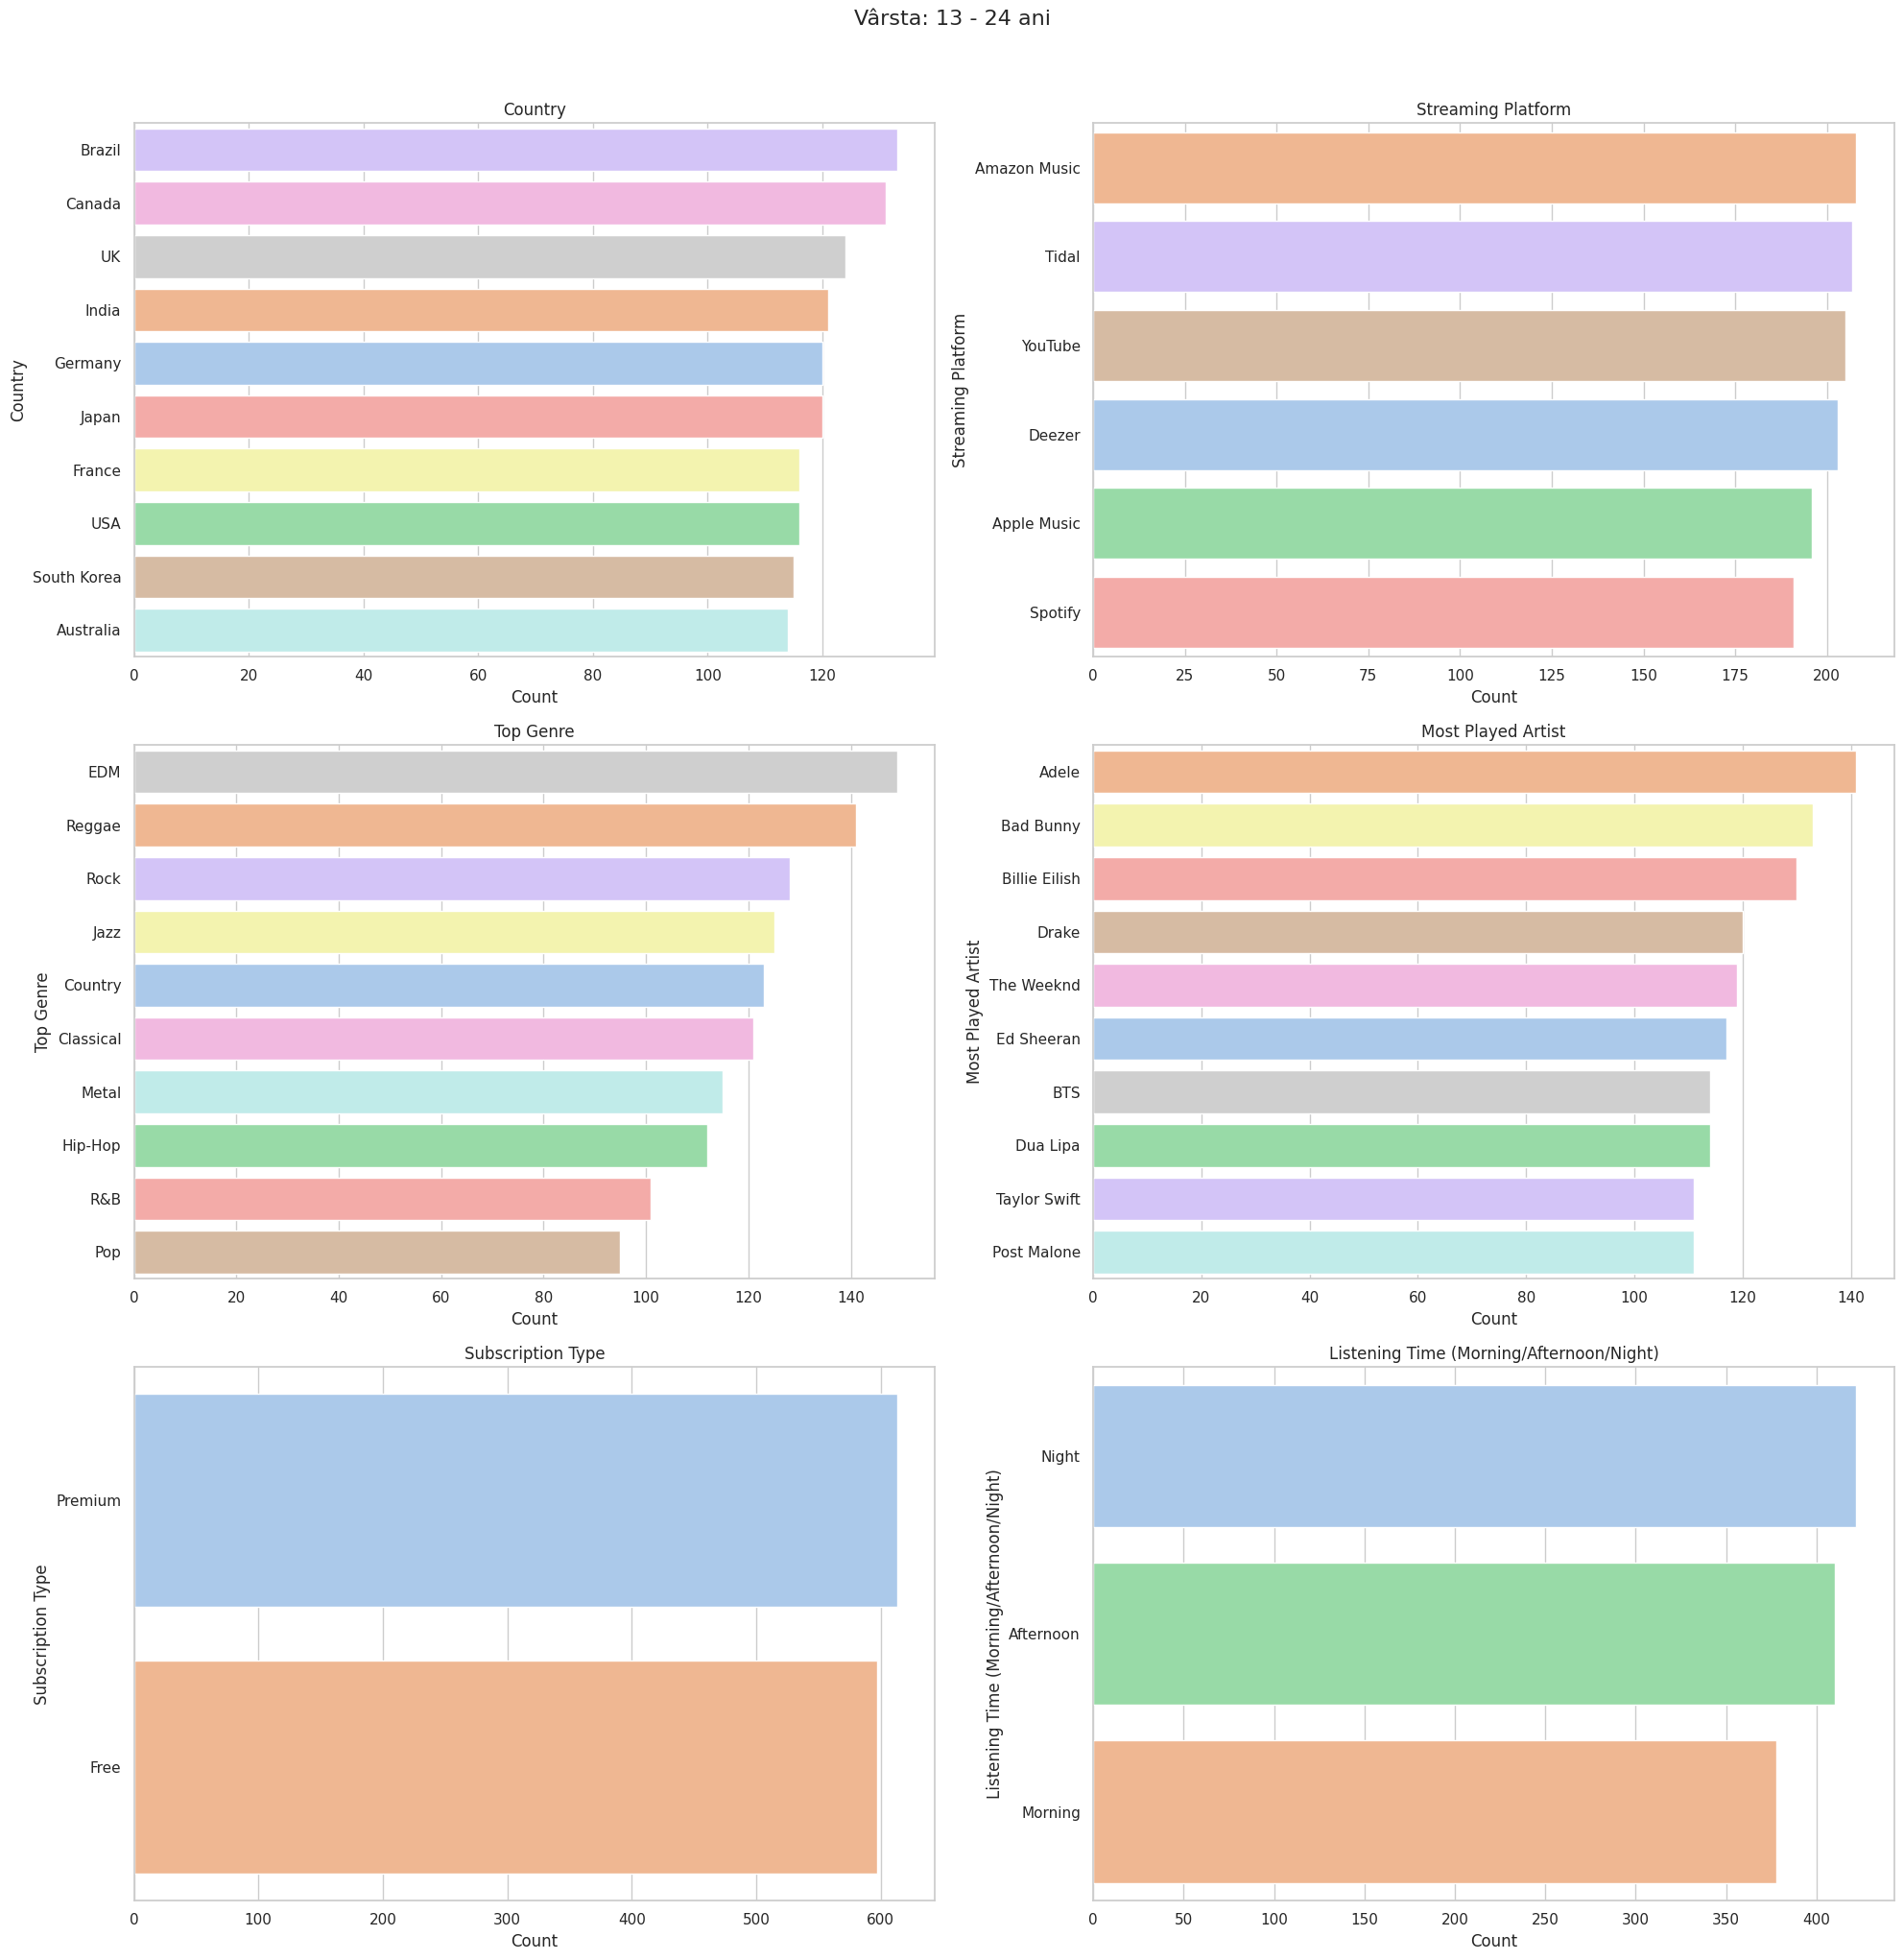

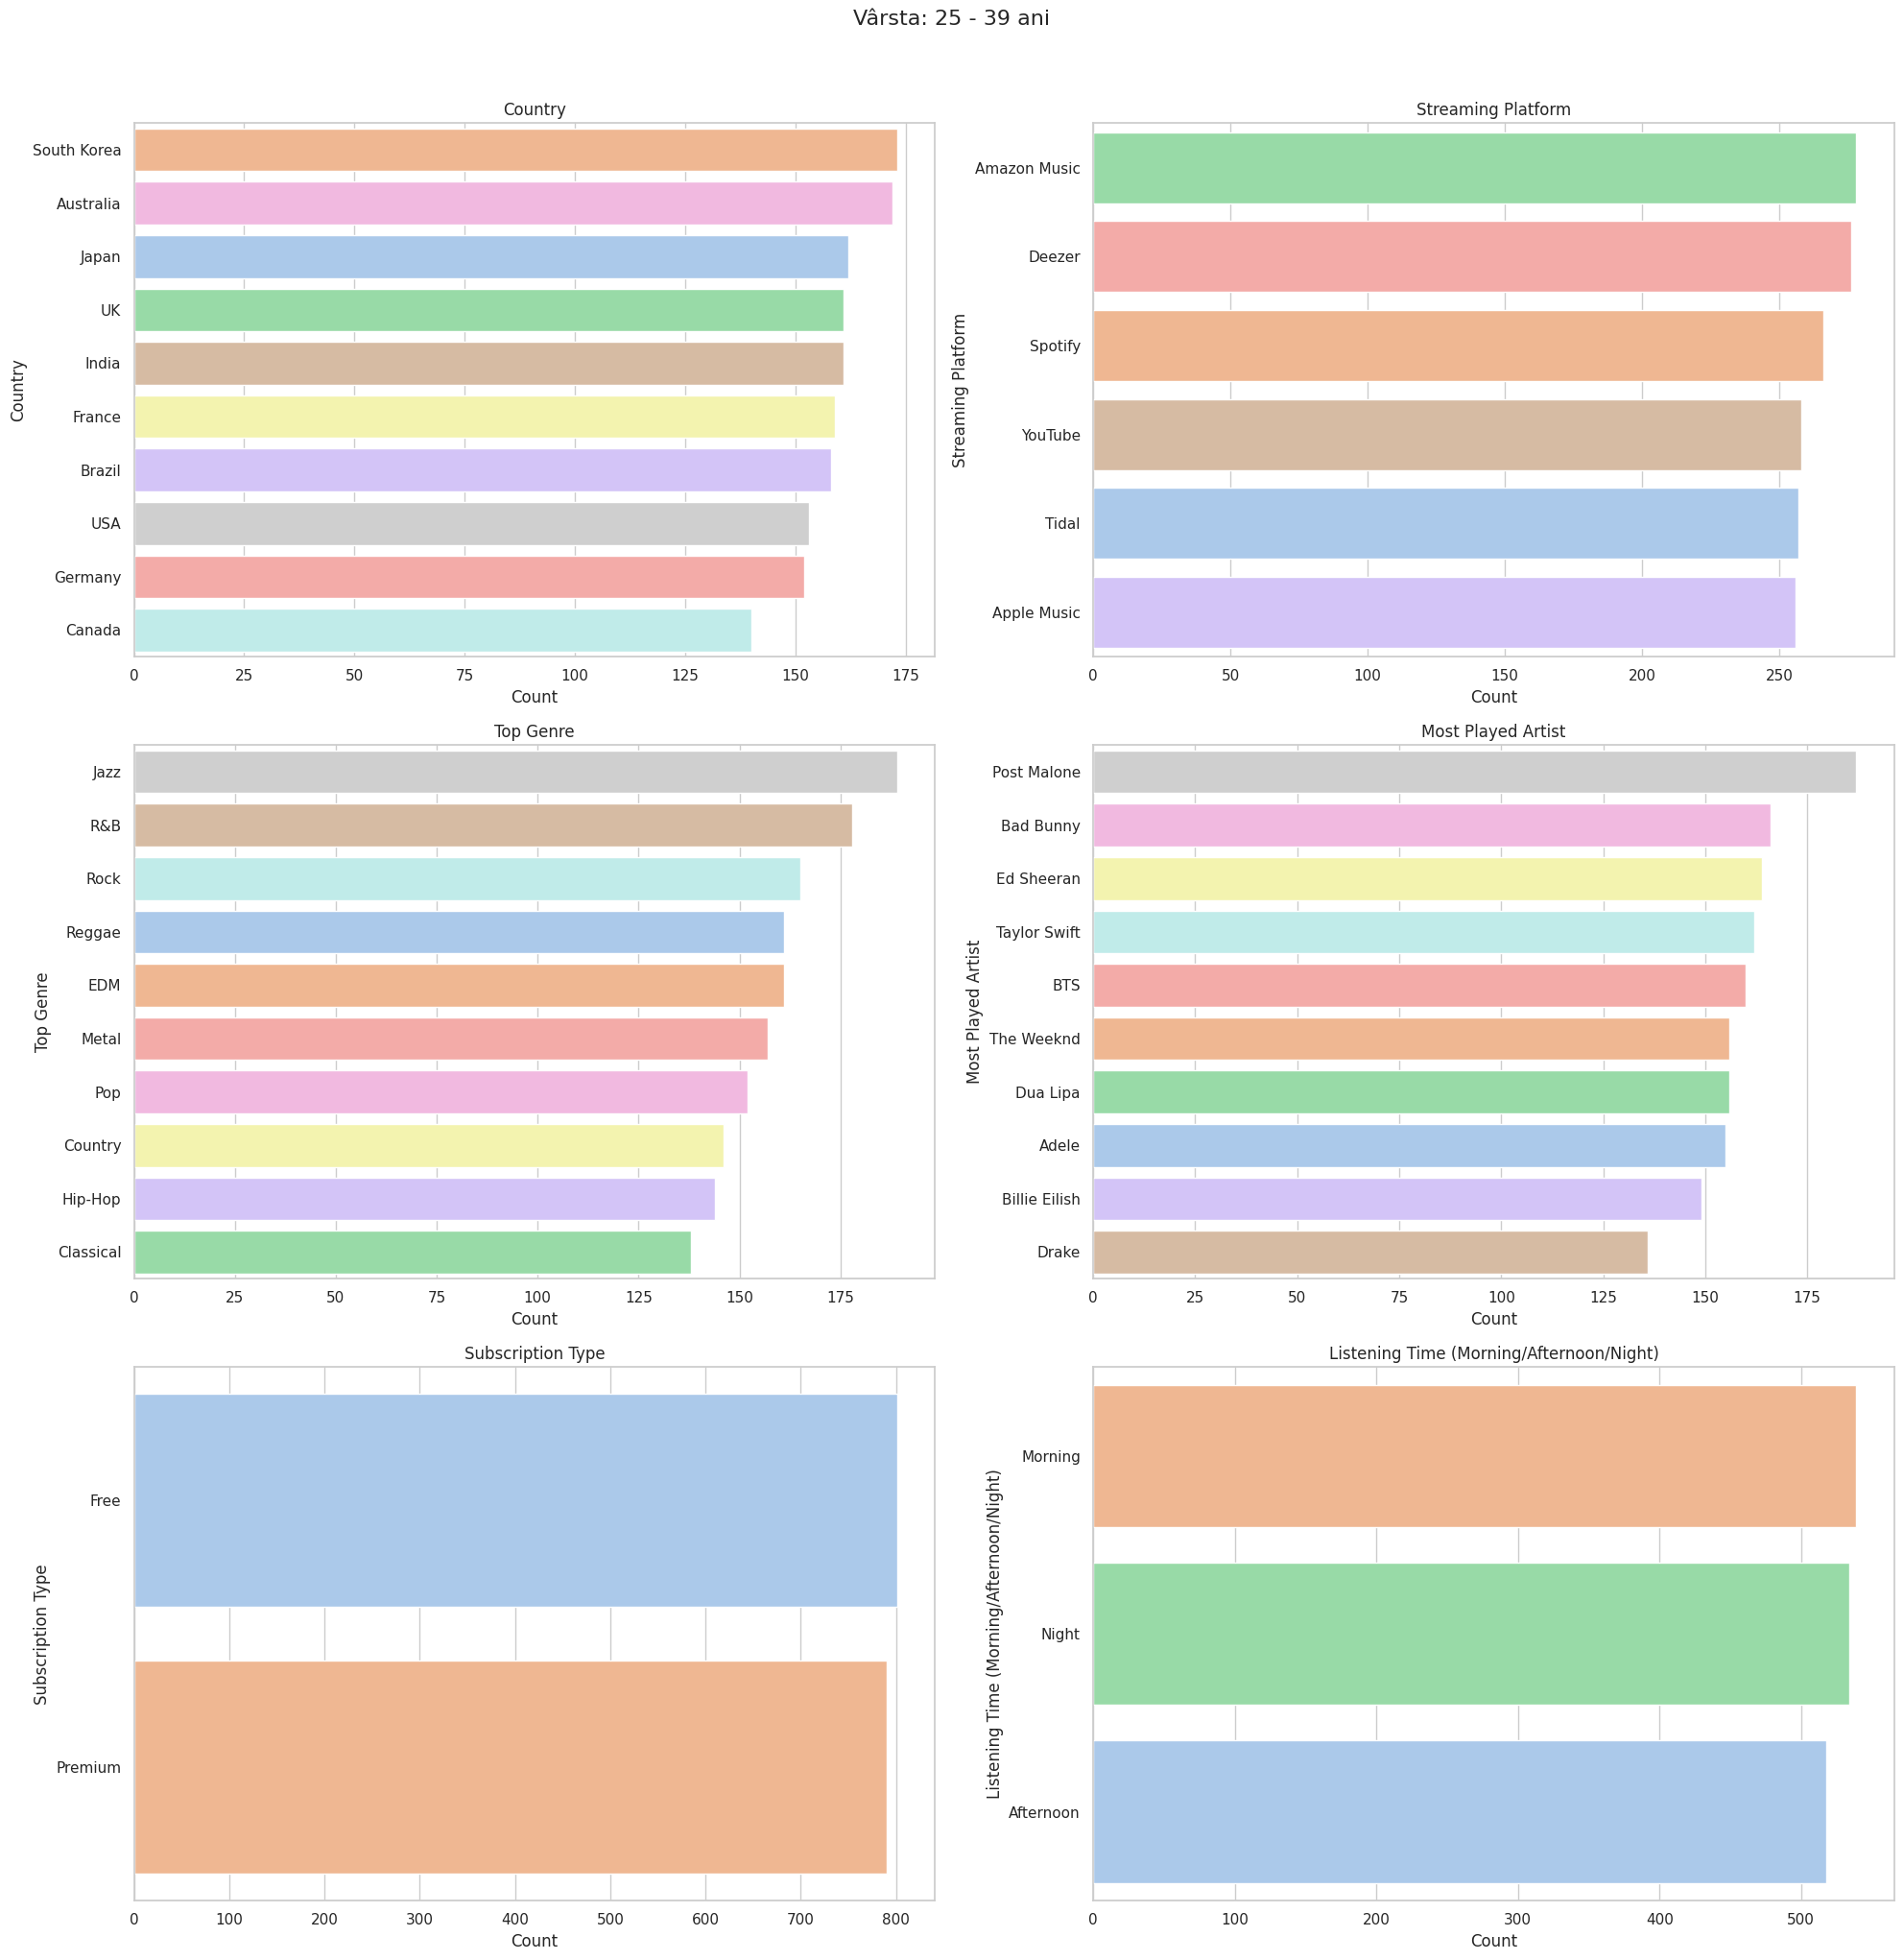

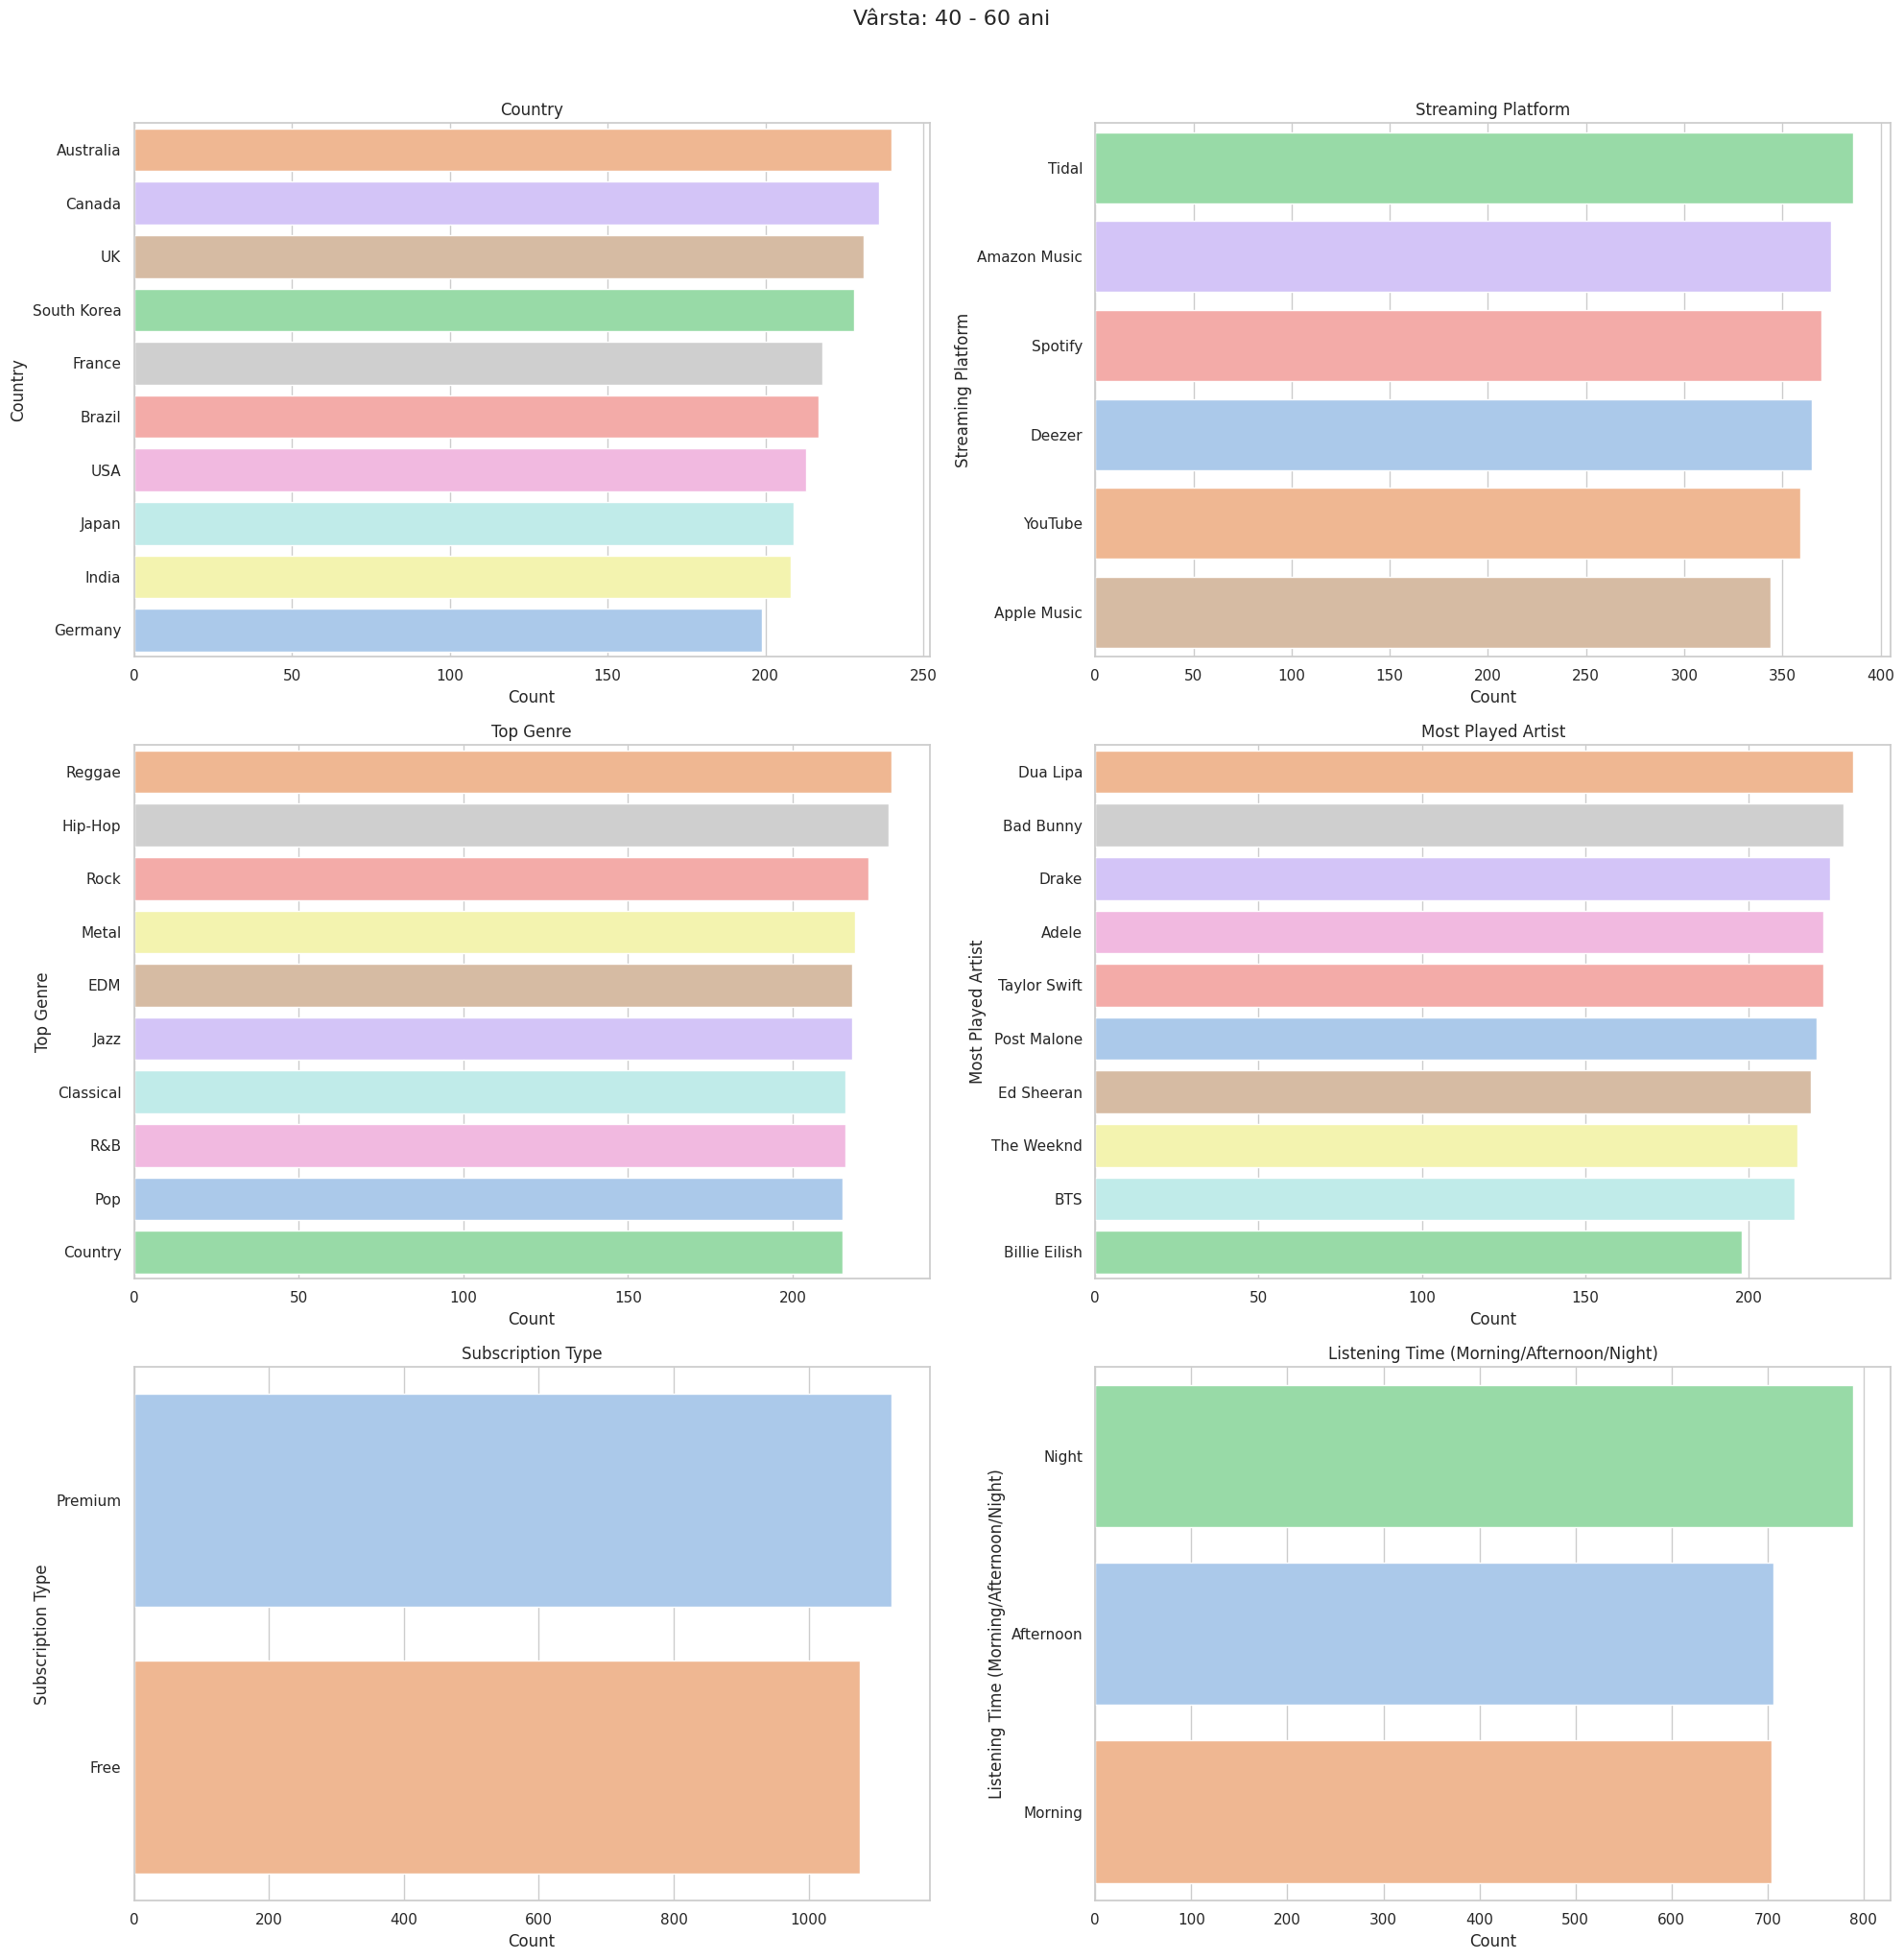

In [82]:
categorical_columns = ['Country', 'Streaming Platform', 'Top Genre',
                       'Most Played Artist', 'Subscription Type',
                       'Listening Time (Morning/Afternoon/Night)']

# Funcție pentru a plota distribuțiile categorice
def plot_categorical_distributions(data, age_range_title):
    num_plots = len(categorical_columns)
    plt.figure(figsize=(20, 20))

    for i, col in enumerate(categorical_columns, 1):
        plt.subplot((num_plots + 1) // 2, 2, i)
        sns.countplot(y=col, data=data, order=data[col].value_counts().index, hue=col, palette='pastel', legend=False)
        plt.title(col)
        plt.xlabel('Count')
        plt.tight_layout()

    plt.suptitle(f'{age_range_title}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Apeluri pentru fiecare subset de vârstă
plot_categorical_distributions(df_13_24, 'Vârsta: 13 - 24 ani')
plot_categorical_distributions(df_25_39, 'Vârsta: 25 - 39 ani')
plot_categorical_distributions(df_40_60, 'Vârsta: 40 - 60 ani')

In [83]:
germanias = df[df['Country']=='Germany']
top_genre_india = germanias.groupby('Top Genre')
genre =  top_genre_india['Minutes Streamed Per Day'].sum()
genre = genre.sort_values(ascending=False)
genre  =  dict(genre)
for key in genre.keys():
    genre[key] /=60

<ipython-input-84-0c4b77914fdd>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




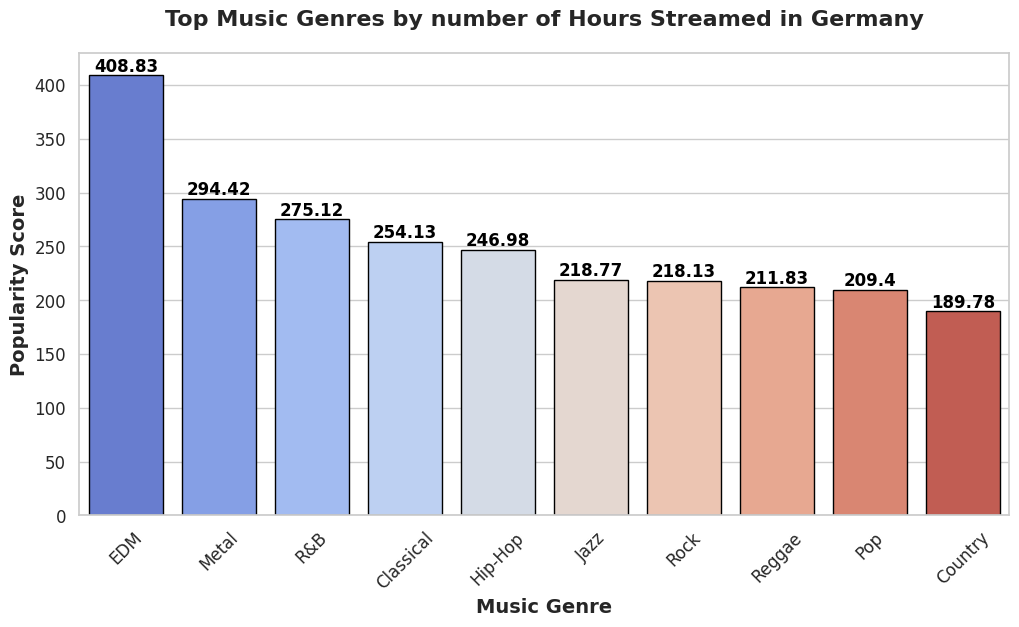

In [84]:
genres = list(genre.keys())
values = [round(value, 2) for value in genre.values()]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.barplot(x=genres, y=values, palette="coolwarm", edgecolor="black")

plt.xlabel("Music Genre", fontsize=14, fontweight='bold')
plt.ylabel("Popularity Score", fontsize=14, fontweight='bold')
plt.title("Top Music Genres by number of Hours Streamed in Germany", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

<ipython-input-85-678442bd8788>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




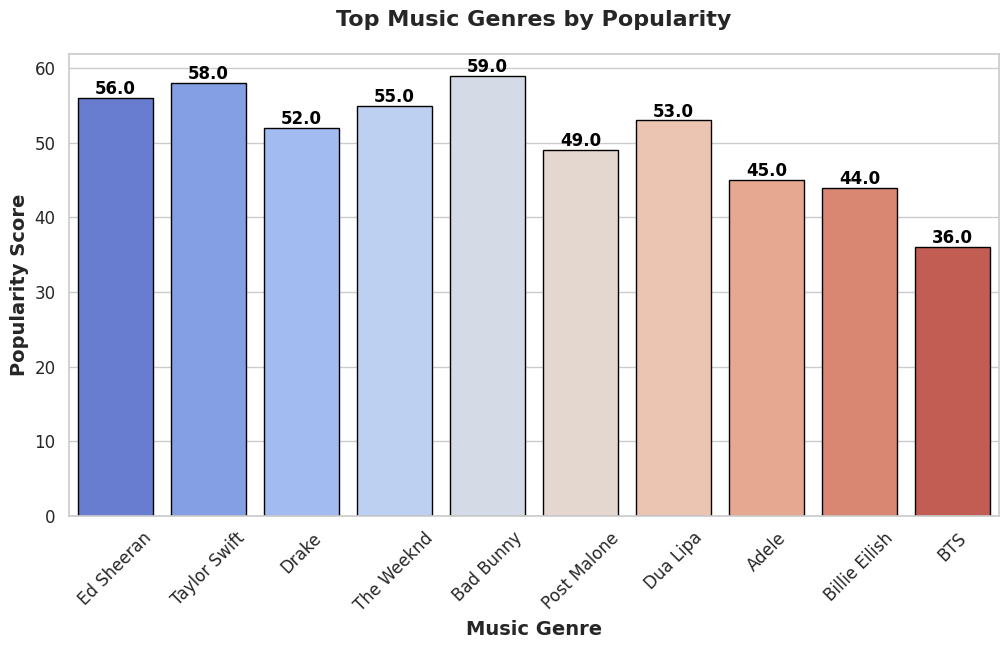

In [85]:
canada = df[df['Country']=='Canada']
canada['Subscription Type'].value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.countplot(x=canada["Most Played Artist"], palette="coolwarm", edgecolor="black")

plt.xlabel("Music Genre", fontsize=14, fontweight='bold')
plt.ylabel("Popularity Score", fontsize=14, fontweight='bold')
plt.title("Top Music Genres by Popularity", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

<Figure size 1200x600 with 0 Axes>

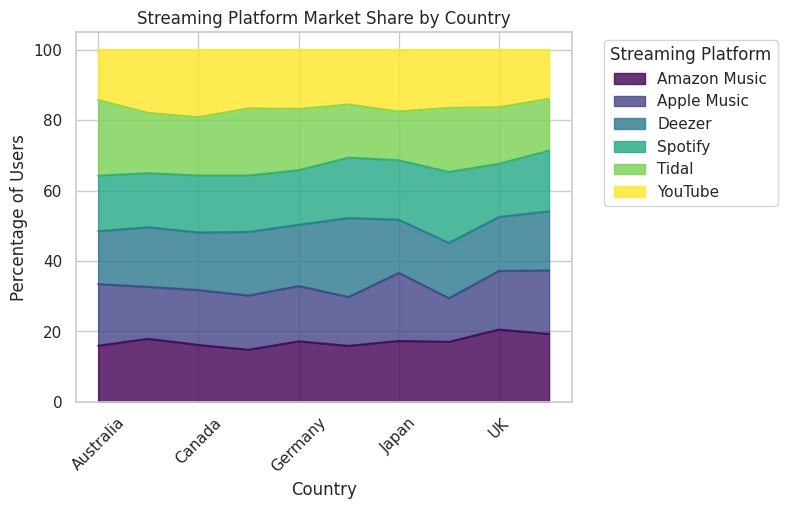

In [86]:
df_pivot = df.pivot_table(index="Country", columns="Streaming Platform", aggfunc="size", fill_value=0)
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12,6))
df_pivot.plot(kind="area", stacked=True, colormap="viridis", alpha=0.8)
plt.title("Streaming Platform Market Share by Country")
plt.ylabel("Percentage of Users")
plt.xlabel("Country")
plt.legend(title="Streaming Platform", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

In [87]:
import pandas as pd
import plotly.express as px
import pycountry

country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

country_counts['iso_alpha'] = country_counts['Country'].apply(get_country_code)

country_counts = country_counts.dropna(subset=['iso_alpha'])

fig = px.choropleth(
    country_counts,
    locations='iso_alpha',
    color='Count',
    hover_name='Country',
    color_continuous_scale='Viridis',
    title='Number of Listeners by Country'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    title_x=0.5
)

fig.show()


In [95]:
import kaggle

kaggle.api.dataset_download_files("ivannatarov/spotify-daily-top-200-songs-with-genres-20172021", path='./data', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/ivannatarov/spotify-daily-top-200-songs-with-genres-20172021


In [101]:
import pandas as pd
df1 = pd.read_csv('/content/data/data.csv', sep='#')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321200 entries, 0 to 321199
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Position    321200 non-null  int64 
 1   Track Name  321182 non-null  object
 2   Artist      321182 non-null  object
 3   Streams     321200 non-null  int64 
 4   Date        321200 non-null  object
 5   Genre       321182 non-null  object
dtypes: int64(2), object(4)
memory usage: 14.7+ MB


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [108]:
artist_stats = df1.groupby(['Artist', 'Genre']).agg({
    'Streams': ['sum', 'mean', 'count']
}).reset_index()

artist_stats.columns = ['Artist', 'Genre', 'Total_Streams', 'Avg_Streams', 'Stream_Count']


In [109]:
# Ensure both keys are strings
df['Most Played Artist'] = df['Most Played Artist'].astype(str)
artist_stats['Artist'] = artist_stats['Artist'].astype(str)

# Merge on artist
df_merged = pd.merge(df, artist_stats,
                     left_on='Most Played Artist',
                     right_on='Artist',
                     how='left')

# Fill missing values from merge
df_merged[['Total_Streams', 'Avg_Streams', 'Stream_Count']] = df_merged[[
    'Total_Streams', 'Avg_Streams', 'Stream_Count'
]].fillna(0)


In [110]:
# Drop only existing columns safely
columns_to_drop = ['User_ID', 'Most Played Artist', 'Artist']
df_model = df_merged.drop(columns=[col for col in columns_to_drop if col in df_merged.columns])

# One-hot encode categorical features
df_model = pd.get_dummies(df_model,
                          columns=['Country', 'Streaming Platform', 'Subscription Type', 'Listening Time (Morning/Afternoon/Night)'],
                          drop_first=True)

# Encode target label
le = LabelEncoder()
df_model['Top_Genre_Label'] = le.fit_transform(df_model['Top Genre'])

# Drop original target column
df_model = df_model.drop(columns=['Top Genre'])


In [111]:
X = df_model.drop(columns=['Top_Genre_Label'])
y = df_model['Top_Genre_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning:

invalid value encountered in divide



In [113]:
from sklearn.exceptions import NotFittedError

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC()
}

results = {}

X_train = pd.DataFrame(X_train).fillna(0)
X_test = pd.DataFrame(X_test).fillna(0)
X_train_scaled = pd.DataFrame(X_train_scaled).fillna(0)
X_test_scaled = pd.DataFrame(X_test_scaled).fillna(0)

for name, model in models.items():
    try:
        if name in ["SVM", "Logistic Regression"]:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        results[name] = {
            "accuracy": acc,
            "y_pred": y_pred,
            "model": model
        }
        print(f"🔹 {name} Accuracy: {acc:.4f}")

    except ValueError as e:
        print(f"⚠️ Model {name} failed due to error: {e}")


<ipython-input-113-c4336d250187>:12: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-113-c4336d250187>:13: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



🔹 Random Forest Accuracy: 0.1210
🔹 Logistic Regression Accuracy: 0.1160
🔹 Decision Tree Accuracy: 0.0930
🔹 SVM Accuracy: 0.1010


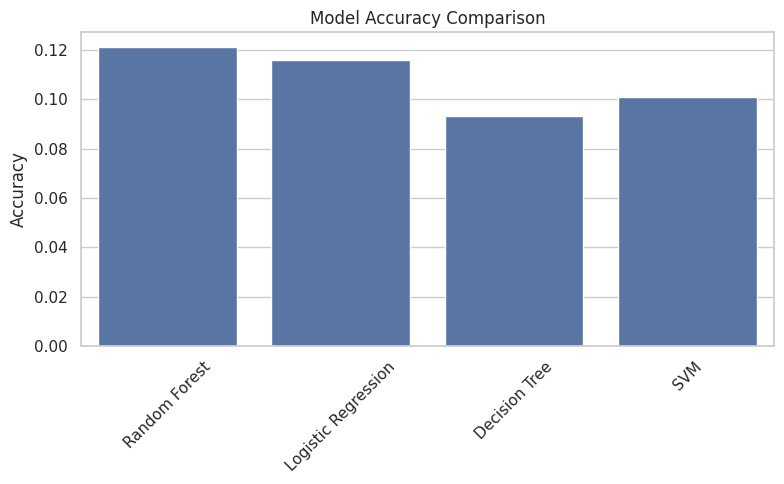

In [114]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=[r['accuracy'] for r in results.values()])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


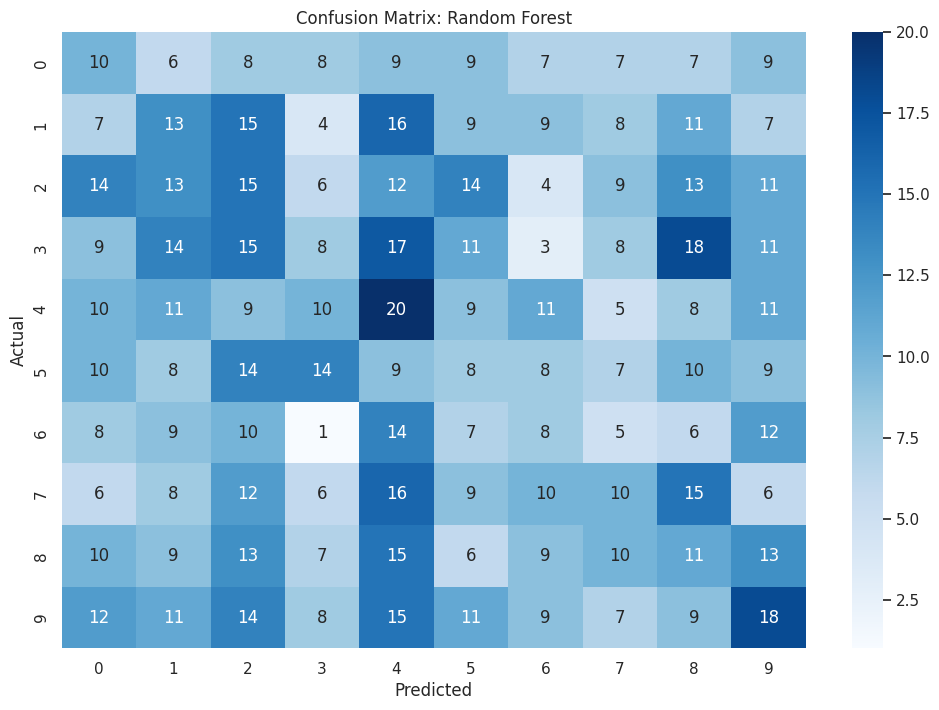

In [115]:
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_y_pred = results[best_model_name]['y_pred']

cm = confusion_matrix(y_test, best_y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [2]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/abhiramag/spotify-data-960k/" + splits["train"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231331 entries, 0 to 231330
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              231331 non-null  object 
 1   album_name        231331 non-null  object 
 2   artists           231331 non-null  object 
 3   danceability      231331 non-null  float64
 4   energy            231331 non-null  float64
 5   key               204953 non-null  object 
 6   loudness          231331 non-null  float64
 7   mode              220554 non-null  object 
 8   speechiness       231331 non-null  float64
 9   acousticness      231331 non-null  float64
 10  instrumentalness  231331 non-null  float64
 11  liveness          231331 non-null  float64
 12  valence           231331 non-null  float64
 13  tempo             231331 non-null  int64  
 14  lyrics            231331 non-null  object 
 15  duration          231331 non-null  int64  
dtypes: float64(8), int64

<ipython-input-4-5af2ebee6460>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['key'].fillna('Unknown', inplace=True)
<ipython-input-4-5af2ebee6460>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

Classification Report - Predicting Mode
              precision    recall  f1-score   support

           0       0.84      0.11      0.20      3267
           1       0.72      0.91      0.80     44415
           2       0.63      0.37      0.46     21718

    accuracy                           0.70     69400
   macro avg       0.73      0.46      0.49     69400
weighted avg       0.69      0.70      0.67     69400



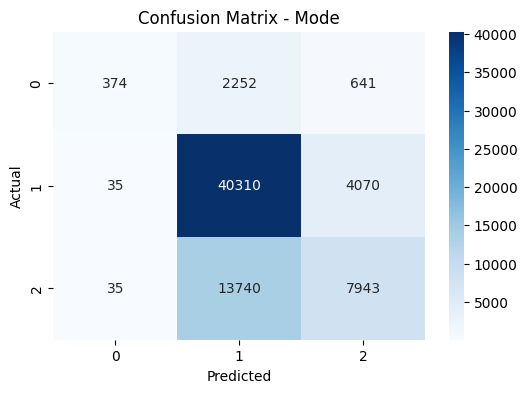

KeyboardInterrupt: 

In [4]:
# Music Classification Analysis.ipynb

# Cell 1: Imports and Initial Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load your DataFrame
# Assuming df is already loaded

# Display first few rows
df.head()

# Cell 2: Data Cleaning and Feature Engineering
# Fill missing categorical values with 'Unknown'
df['key'].fillna('Unknown', inplace=True)
df['mode'].fillna('Unknown', inplace=True)

# Encode categorical columns
label_encoders = {}
for col in ['key', 'mode']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Cell 3: Classification Task 1 - Predicting Mode (Major/Minor)
X = df.drop(columns=['mode', 'name', 'album_name', 'artists', 'lyrics'])
y = df['mode']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report - Predicting Mode")
print(classification_report(y_test, y_pred))

# Cell 4: Confusion Matrix Plot
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Mode')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cell 5: Classification Task 2 - Predicting Key
X = df.drop(columns=['key', 'name', 'album_name', 'artists', 'lyrics'])
y = df['key']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_key = RandomForestClassifier(n_estimators=100, random_state=42)
clf_key.fit(X_train, y_train)
y_pred_key = clf_key.predict(X_test)

print("Classification Report - Predicting Key")
print(classification_report(y_test, y_pred_key))

# Cell 6: Feature Importance Plot
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances for Mode Prediction')
plt.show()

# Cell 7: Additional Classification Task - High vs Low Energy Songs
energy_threshold = df['energy'].median()
df['energy_label'] = (df['energy'] > energy_threshold).astype(int)

X = df.drop(columns=['energy_label', 'name', 'album_name', 'artists', 'lyrics'])
y = df['energy_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_energy = RandomForestClassifier(n_estimators=100, random_state=42)
clf_energy.fit(X_train, y_train)
y_pred_energy = clf_energy.predict(X_test)

print("Classification Report - Predicting High vs Low Energy")
print(classification_report(y_test, y_pred_energy))
